#### Team members: Syed Araib Karim, Amanullah Shareef, Soumya Bhandari, Guntupalli Naga Srija

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords
import nltk
from collections import Counter
nltk.download('stopwords')

def removeElements(lst, k):
    counted = Counter(lst)
      
    temp_lst = []
    for el in counted:
        if counted[el] < k:
            temp_lst.append(el)
              
    res_lst = []
    for el in lst:
        if el not in temp_lst:
            res_lst.append(el)
              
    return(res_lst)

response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
tokens = [t for t in text.split()]
clean_tokens = tokens[:]
sr = stopwords.words('english')
for token in tokens:
  if token in stopwords.words('english'):
    clean_tokens.remove(token)

# removing single characters and words containing numbers
clean_tokens = [i for i in clean_tokens if len(i) > 1 if not any(c.isdigit() for c in i)]

# removing elements which are mentioned 5 or less times.
clean_tokens = removeElements(clean_tokens,5)

freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
  print (str(key) + ':' + str(val))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
SpaceX:144
articles:6
dead:10
external:6
August:34
original:175
American:7
September:30
using:7
company:38
containing:6
October:19
identifiers","Articles:8
companies:13
United:7
established:6
launch:96
service:6
based:8
Los:11
Angeles:8
Greater:6
technology:5
private:22
aerospace:5
article:17
rocket:39
For:6
Exploration:7
Technologies:6
December:45
flight:18
Falcon:92
May:69
landing:20
billion:17
Musk:31
part:7
series:5
Boring:8
Crew:24
Test:9
space:23
costs:6
crew:12
spacecraft:18
achievements:5
first:80
privately:6
orbit:10
successfully:14
orbit,:6
send:10
International:7
Space:72
Station:6
orbital:15
reuse:5
astronauts:9
theInternational:14
Dragon:45
one:11
developing:6
satellite:27
Starlink:25
provide:13
commercial:22
internet:7
In:12
January:34
constellation:9
largest:5
also:15
Starship:25
become:5
vehicle:15
Heavy:15
reusable:9
payload:5
early:14
Dragon,:6
NASA:34
Commer

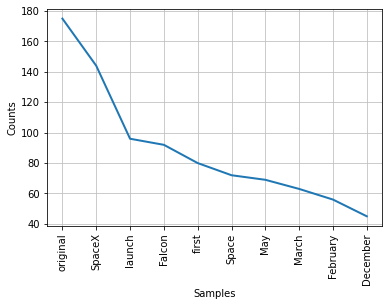

In [ ]:
freq.plot(10, cumulative= False)

### Bar Chart for Question 3

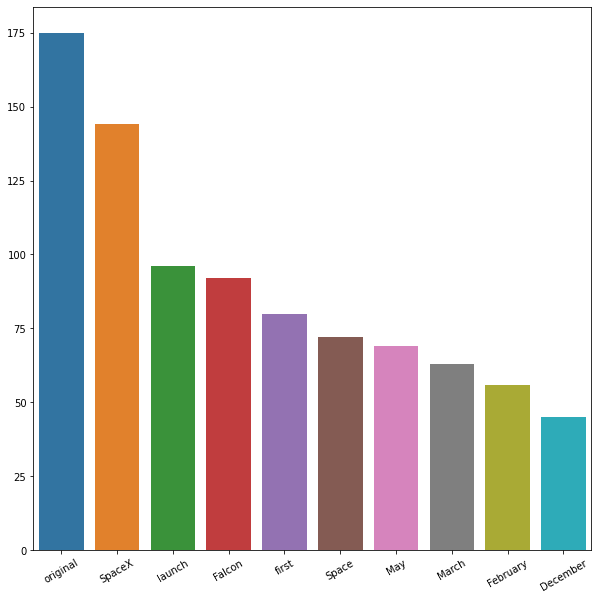

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
all_fdist = nltk.FreqDist(clean_tokens).most_common(10)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);